In [1]:
# #coding:utf-8
# import time
# import numpy as np
# import pandas as pd
# #search = range(1,10)
# search = []
# enerlist = []
# idlist = []
# bklist = []

# def get_ener_peer(path1,path2):
#     with open(path1, "r", encoding='utf-8') as f:
#         lines = f.readlines()
#         line_1 = lines[-1].split()
#         E0 = line_1[4]
#         E0 = float(E0)
#     with open(path2, "r", encoding='utf-8') as f:
#         N = []
#         lines = f.readlines()
#         line_7 = lines[6].split()
#         N = [ float(n) for n in line_7 ]
#         N_all = sum(N)
#     E = E0 / N_all
#     return E
# def hist(search):   
#     search = search
#     for i in search:
#         try:
#             ener = np.float(get_ener_peer(path1="./rw_bys"+str(i)+"/02_scf/OSZICAR",path2="./rw_"+str(i)+"/02_scf/POSCAR"))
#             print(ener)
#             idlist.append(i)
#             enerlist.append(ener)
#         except:
#             bklist.append(i)
#     print(idlist)
#     print(enerlist)
#     print(bklist)
#     #import pandas as pd
#     data = pd.DataFrame()
#     data["id"]=idlist
#     data["ener"]=enerlist
#     print(data)
#     return data.to_csv("./ener&id",index=None)
# def find_formula(path = "./BaTiO3_mp-5777_computed.vasp"):
#         box = []
#         with open(path, "r") as f:
#             file = f.readlines()
#             box.append(file)
#         symbol = box[0][5].strip().split()
#         number = box[0][6].strip().split()
#         formula = str()
#         for i in range(len(symbol)):
#             #print(i)
#             #print(symbol[i],number[i])
#             formula = formula+symbol[i]+number[i]
#         return formula,number
    
# def atm_unmber(path="./CONTCAR"):
#     atm = 0
#     for i in find_formula(path)[0]:
#         atm+=1
#     return atm

# def force( path1 = "./OUTCAR",path2 = "./POSCAR"):
#     import numpy as np
#     path1 = path1
#     path2 = path2
#     mark = None
#     DAT = []
#     cell_atom_num = 0
#     line_num = 0
#     fileHandler = open(path1,"r")
#     while  True:
#         line  =  fileHandler.readline()
#         if  not  line  :
#             break;
#         DAT.append(line)
#     print("DAT",DAT)
#     for r in DAT:
#         #print(r)  
#         if "total drift:" in r:
#             mark = line_num
#         else:
#             pass
#         line_num += 1
#     print("mark",mark)
#     a,b = find_formula(path2)
#     for i in b:
#         cell_atom_num+=int(i)
#     Drift = DAT[mark-cell_atom_num-2:mark+1]
#     force_sum = []
#     for force in [x.split()[3:] for x in Drift[1:-2]]:
#         force_sum.append(force[0])
#         force_sum.append(force[1])
#         force_sum.append(force[2])
#     cac_force = abs(np.float32(force_sum)).max()
#     print(int(cac_force*10000))
#     return cac_force*10000

# def submit(i):
#     import os
#     import time
#     import os.path
#     import time
#     import re
#     os.mkdir("./rw_bys"+str(i))
#     os.system("cp -r demo_bys/* ./rw_bys"+str(i))
#     os.system("wait")
#     os.system("cp CONTCAR ./rw_bys"+str(i))
#     os.system("cp para.txt ./rw_bys"+str(i))
#     os.system("wait")
#     print("go to "+str(i)+" times random walk optimize search")
#     time.sleep(1)
#     mine = os.getcwd()
#     os.chdir(str(mine)+"/rw_bys"+str(i))
#     os.system("bash ./goRW.sh")  ## rw and submit vasp task
#     os.chdir(str(mine))
#     scf = 0
#     while abs(scf)<1:
#         if os.path.isfile("./rw_bys"+str(i)+"/02_scf/already_scf"):
#             print("scf ending...")
#             scf = 1
#             ener = np.float64(get_ener_peer(path1="./rw_bys"+str(i)+"/02_scf/OSZICAR",path2="./rw_bys"+str(i)+"/02_scf/POSCAR"))
#             Force = force(path1="./rw_bys"+str(i)+"/02_scf/OUTCAR",path2="./rw_bys"+str(i)+"/02_scf/POSCAR")
#             print(i,ener)
#             print(i,Force)
#             #search.append(i)
#     #np.savetxt("search_index",search)
#     #print(search)
#     return force
# def gen_para(para = [[1,2,3,4,1,1,1,1],[1,1,1,1,1,1,1,1],[1,1,1,1,1,1,1,1]]):
#     import numpy as np
#     para = para
#     np.savetxt('para.txt',para)

# import optuna
# def objective(trial):
#     import time
#     atm1_r = trial.suggest_float("atm1_r", 0.3, 1.2)
#     atm2_r = trial.suggest_float("atm2_r", 0.3, 1.2)
#     atm3_r = trial.suggest_float("atm3_r", 0.3, 1.2)
#     atm4_r = trial.suggest_float("atm4_r", 0.3, 1.2)
#     atm5_r = trial.suggest_float("atm5_r", 0.3, 1.2)
#     atm6_r = trial.suggest_float("atm6_r", 0.3, 1.2)
#     atm7_r = trial.suggest_float("atm7_r", 0.3, 1.2)
#     atm8_r = trial.suggest_float("atm8_r", 0.3, 1.2)
    
#     atm1_s = trial.suggest_float("atm1_s", 0, 360)
#     atm2_s = trial.suggest_float("atm2_s", 0, 360)
#     atm3_s = trial.suggest_float("atm3_s", 0, 360)
#     atm4_s = trial.suggest_float("atm4_s", 0, 360)
#     atm5_s = trial.suggest_float("atm5_s", 0, 360)
#     atm6_s = trial.suggest_float("atm6_s", 0, 360)
#     atm7_s = trial.suggest_float("atm7_s", 0, 360)
#     atm8_s = trial.suggest_float("atm8_s", 0, 360)
    
#     atm1_p = trial.suggest_float("atm1_p", 0, 360)
#     atm2_p = trial.suggest_float("atm2_p", 0, 360)
#     atm3_p = trial.suggest_float("atm3_p", 0, 360)
#     atm4_p = trial.suggest_float("atm4_p", 0, 360)
#     atm5_p = trial.suggest_float("atm5_p", 0, 360)
#     atm6_p = trial.suggest_float("atm6_p", 0, 360)
#     atm7_p = trial.suggest_float("atm7_p", 0, 360)
#     atm8_p = trial.suggest_float("atm8_p", 0, 360)
    
#     para = [[atm1_r,atm2_r,atm3_r,atm4_r,atm5_r,atm6_r,atm7_r,atm8_r],
#             [atm1_s,atm2_s,atm3_s,atm4_s,atm5_s,atm6_s,atm7_s,atm8_s],
#             [atm1_p,atm2_p,atm3_p,atm4_p,atm5_p,atm6_p,atm7_p,atm8_p]]
    
#     gen_para(para=para)
#     tm= str(time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())).replace(" ", "-").replace(":","").replace("-","")
#     FForce = submit(i=tm)
#     return FForce

# study = optuna.create_study()
# study.optimize(objective, n_trials=100)

In [1]:
def read_loopdata(path="rw_bys20211227170900/02_scf/enerlog"):
    import os
    import re
    a=open(path,"rb").readlines()
    force_value = int(re.findall(r'\d+',str(a[-1]))[-1])
    return force_value
def read_enerdata(path="rw_bys20211227170900/02_scf/enerlog"):
    import os
    import re
    a=open(path,"rb").readlines()
    force_value = (re.findall(r'-\d+.\d+',str(a[-1]))[-1])
    return float(force_value)

In [5]:
#$float(read_enerdata())

In [11]:
import pandas as pd
import os
idlist = []
fvlist = []
enlist = []
df = pd.DataFrame()
dirlist = os.listdir("./")
for i in dirlist:
    #print(i)
    try:
        fv = read_loopdata(path=str(i)+"/01_relax/01_do/loopdata")
        ener = read_enerdata(path=str(i)+"/02_scf/enerlog")
        #print(i,fv,ener)
        idlist.append(i)
        fvlist.append(fv)
        enlist.append(ener)
    except:
        pass
df["id"] = idlist
df["fv"] = fvlist
df["en"] = enlist

In [12]:
df

,id,fv,en
0,rw_bys20220106045307,147,-4.817971
1,rw_bys20220106213945,1120,-3.752624
2,rw_bys20220106103738,231,-4.503209
3,rw_bys20220106193014,60,-4.817940
4,rw_bys20220106052803,1593,-4.420378
5,rw_bys20220106184838,48,-4.817943
6,rw_bys20220107000535,212,-4.817932
7,rw_bys20220107005300,1456,-4.485887
8,rw_bys20220106111254,1843,-3.821527
9,rw_bys20220106123518,1523,-4.817755


In [13]:
df2 = df.sort_values(by="fv")
df2.to_csv("./cac_log.csv",index=None)

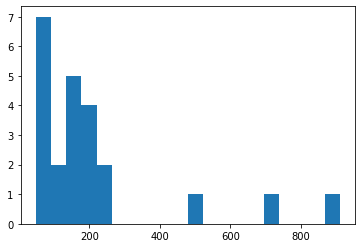

In [20]:
import matplotlib.pyplot as plt
plt.hist(df2.fv[df.fv<1000],bins = 20)
plt.show()